In [1]:
using QuantumAnnealingTools
using Plots

Activating environment at `D:\Dropbox (Personal)\MyRepos\QTool.jl\Project.toml`


┌ Info: Recompiling stale cache file C:\Users\chenh\.julia\compiled\v1.2\QuantumAnnealingTools\iRrSZ.ji for QuantumAnnealingTools [e429f160-8886-11e9-20cb-0dbe84e78965]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\chenh\.julia\compiled\v1.2\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


# HybridOhmic bath and MRT example

In this example, we will try to recreate figure 2(a) of reference [Lanting et al.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.83.180502) with a hybrid noise model of both slow part and Ohmic part. In the simulation, we choose
\begin{align}
    W &= 22 (\mathrm{mK}) \\
    T &= 21 (\mathrm{mK}) \\
    f_c &= 8(\mathrm{GHz}) \\
    2\pi\eta &= 0.41
\end{align}
It is important to notice that the definition of $\eta$ here is not consistent with the notation used in the reference paper. There is a factor of $2\pi$.

In [2]:
W = 22
η = 0.41/2/π
T = 21
fc = 8

Δ = 2*π*3.15 / 1000

bath = HybridOhmic(W, η, fc, T)

Hybrid Ohmic bath instance:
W (mK): 22.0
ϵl (GHz): 0.2401171504038241
η (unitless): 0.06525352666767709
ωc (GHz): 8.0
T (mK): 21.0
ϵ (GHz): 0.7621453637452407

Then we plot the MRT profile with those parameters. First, we plot the Gaussian profile only

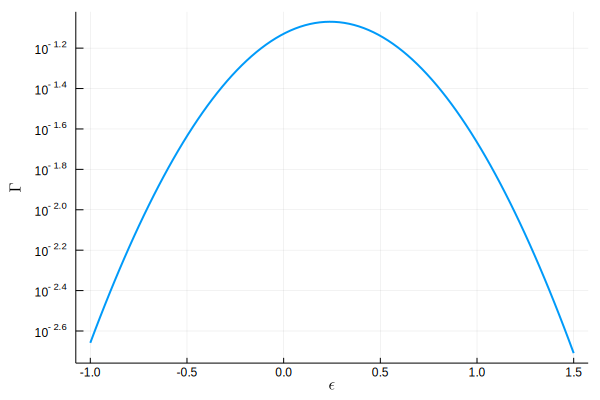

In [13]:
x_axis_low = range(-1,1.5,length=100)
low_freq = [Gₗ(2*π*x, bath)*Δ^2/4*1000 for x in x_axis_low]
plot(x_axis_low, low_freq, yscale=:log10, label="", linewidth=2)
xlabel!(L"\epsilon")
ylabel!(L"\Gamma")

Then we plot the profile of the hybrid noise

In [4]:
x_axis = range(-1,4,length=100)
mrt = [MRT_Γ(2π*x, Δ, bath)[1]*1000 for x in x_axis];

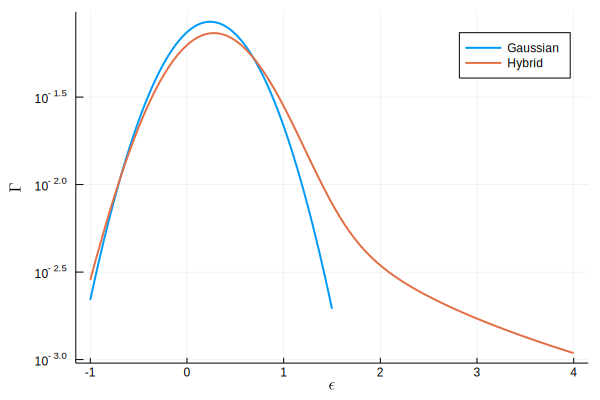

In [12]:
plot(x_axis_low, low_freq, yscale=:log10, label="Gaussian", linewidth=2)
plot!(x_axis, mrt, yscale=:log10, label="Hybrid", linewidth=2)
xlabel!(L"\epsilon")
ylabel!(L"\Gamma")